## Problem aproksimacije funkcije
Na najvišem nivou rešavamo problem aproksimacije date funkcije, što bi značilo odrediti neku novu funkciju koja je njoj bliska u nekom unapred definisanom smislu. Motivacija za to je komplikovana upotreba date funkcije (pa se aproksimacijom pojednostavljuje - npr. zameni se polinomom), zatim data funkcija može imati neka nepoželjna matematička svojstva (npr. nije konveksna pa se zameni takvom) ili, što je najčešći razlog, vrednosti date funkcije su poznate samo na diskretnom skupu tačaka. 

#### Definisanje bliskosti dve funkcije
Za datu funkciju može postojati više različitih funkcija koje je aproksimiraju pa se kriterijumi kvaliteta aproksimacije razlikuju u odnosu na ono što se aproksimacijom želi postići. Definicija bliskosti dve funkcije zavisi od izbora prostora u kome određujemo aproksimaciju - u našem slučaju bliskost definišemo unutar Hilbertovog prostora, Hilbertovog prostora $L_2[a,b]$, sa normom $$\|f\|^2_2 = \int_{a}^{b} f^2(x) \, dx, f \in L_2[a,b]$$

Pa je kvalitet aproksimacije funkcije $f \in L_2[a,b]$ funkcijom $g \in L_2[a,b]$: $$\|f - g\|^2_2 = \int_{a}^{b} (f(x) - g(x))^2 \, dx$$

U odnosu na ovaj kriterijum, kvalitet aproksimacije se smatra utoliko boljim što je manja površina između funkcija. 

U slučaju da je funkcija $f$ poznata samo na konačnom skupu tačaka, integral se zamenjuje sumom: $$\|f - g\|^2_2 = \sum_{i=1}^{n} (f(x_i) - g(x_i))^2 \, dx$$

Ako je norma razlike mala, to ne znači da funkcije malo odstupaju jedna od druge u svakoj tački, već da je uglavnom tako. Međutim, mogu postojati tačke u kojima je odstupanje veliko.
#### Element najbolje aproksimacije
Funkcija $g$ kojom se vrši aproksimacija najčešće ima neku relativno jednostavnu parametarsku reprezentaciju, poput algebarskog ili trigonometrijskog polinoma, pa se aproksimacija vrši određivanjem vrednosti parametara te reprezentacije.

Neka je $H=L_2[a,b]$.
##### _Teorema_
Neka je $f$ element Hilbertovog prostora $H$ i neka je $H'$ njegov potprostor čiju bazu čine elementi $\{g_1, g_2, \dots, g_n\}$. Postoji element najbolje aproksimacije $ g^* = \sum_{i=1}^{n} c_i^* g_i \in H$, takav da važi $$ \|f - \sum_{i=1}^{n} c_i^* g_i\| = \inf_{c_1, \dots, c_n} \|f - \sum_{i=1}^{n} c_i g_i\| $$
Dodatno, važi da je $(f - g^*) \cdot x = 0$ za sve $x \in H$ ako i samo ako je $g^*$ element najbolje aproksimacije za $f$ iz $H$. Drugim rečima, element najbolje aproksimacije za $f$ je njegova ortogonalna projekcija na prostor $H'$.
Na osnovu ove teoreme sledi da se koeficijenti najbolje aproksimacije mogu odrediti iz sistema: 
$$ \sum_{i=1}^{n} c_i (g_i \cdot g_j) = f \cdot g_j, \quad j = 1, \dots, n$$
Ukoliko je baza $g_1, \dots, g_n$ ortogonalna, svi skalarni proizvodi $g_i \cdot g_j$ su jednaki nuli ako $i \neq j$, tako da u tom slučaju nije potrebno rešavati sistem jednačina, već je dovoljno izračunati skalarne proizvode i izraziti koeficijente $c_i$ iz dobijenih jednakosti.
Ove jednačine nazivaju se jednačinama normale.

#### Element najbolje srednjekvadratne aproksimacije
U našem slučaju element najbolje aproksimacije naziva se element najbolje srednjekvadratne aproksimacije.
Ako je funkcija $f \in L_2[a,b]$ definisana samo na konačnom skupu tačaka $x_0, \dots, x_m$ iz intervala $[a, b]$, integral se zamenjuje sumom, pa su skalarni proizvod i odgovarajuća norma dati jednakostima:
$$f \cdot g = \sum_{i=1}^{m} f(x_i)g(x_i)$$
$$\|f\|^2 = f \cdot f = \sum_{i=1}^{m} f^2(x_i)$$
Sada su jednačine normale: $$\sum_{i=1}^{n} c_i \sum_{k=1}^{m} g_i(x_k) g_j(x_k) = \sum_{k=1}^{m} f(x_k) g_j(x_k), \quad j = 1, \dots, n$$
U matričnom obliku:
$$ A := \begin{bmatrix} g_1(x_1) & \dots & g_1(x_m) \\ \vdots & \ddots & \vdots \\ g_n(x_1) & \dots & g_n(x_m) \\ \end{bmatrix} 
   , x := \begin{bmatrix} c_1 \\ \vdots \\ c_n \\ \end{bmatrix}
   , b := \begin{bmatrix} f(x_1) \\ \vdots \\ f(x_m) \\ \end{bmatrix},  Ax = b$$
Odnosno: $$ x = (A^TA)^{-1}A^Tb $$
Što predstavljaja rešenje optimizacionog problema $$ \min_x \|Ax - b\|^2 $$
Ukoliko je matrica $A^TA$ loše uslovljena, što je moguće ukoliko su kolone ili vrste matrice $A$ visoko korelisane, problem najmanjih kvadrata je i sam loše uslovljen. U tom slučaju se pribegava regularizaciji i rešava se: $$\min_x \|Ax - b\|^2 + \lambda \|x\|^2$$
U slučaju rešavanja metode najmanjih kvadrata dodajemo uslov da mora biti $ x >= 0 $.

### Primer resavanja metode nenegativnih najmanjih kvadrata sa i bez regularizacije

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear

In [2]:
# Definisemo proizvoljnu funkciju ciju aproksimaciju trazimo
x = np.linspace(0, 1, 10)
f = x + 50 + 0.08 * np.random.randn(10)

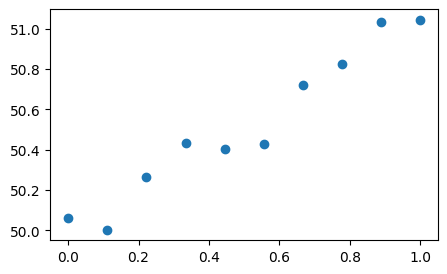

In [3]:
# Prikaz funkcije
plt.figure(figsize=(5, 3))
plt.scatter(x, f)
plt.show()

In [4]:
# Konstrukcija matrice A
baza = np.array([x]).transpose()
A = np.hstack((np.ones((baza.shape[0], 1)), baza))

b = f

print("A", A, "b", b, sep='\n')

A
[[1.         0.        ]
 [1.         0.11111111]
 [1.         0.22222222]
 [1.         0.33333333]
 [1.         0.44444444]
 [1.         0.55555556]
 [1.         0.66666667]
 [1.         0.77777778]
 [1.         0.88888889]
 [1.         1.        ]]
b
[50.06043973 50.00308386 50.26500008 50.43385319 50.40533158 50.42939491
 50.71949315 50.82449425 51.03208758 51.04370724]


In [5]:
# Racunamo uslovljenost A^TA
ATA = A.T @ A
cond = np.linalg.cond(ATA)
cond

15.879787809113273

##### Algebarski pristup
Demonstrativno - Zbog mogucnosti lose uslovljenosti i/ili velike dimenzionalnosti prelazi si na optimizacioni pristup

In [6]:
x_alg = np.linalg.pinv(A).dot(b)
if np.any(x_alg < 0):
    print("Nema resenja.")
else:
    print("Resenje je: ", x_alg)

Resenje je:  [49.98357344  1.07623023]


##### Optimizacioni pristup

In [7]:
# Metoda bez regularizacije 
def method(A, b, alpha=0.01, eps=0.01, max_iter=1000):
    x_old = np.zeros(A.shape[1]) 

    for _ in range(max_iter):
        gradient = 2 * A.T @ (A @ x_old - b)
        x_new = x_old - alpha * gradient
        if np.all(np.abs(x_new - x_old) < eps):
            break

        x_old = x_new
    
    return None if np.any(x_old < 0) else x_old

In [8]:
# Metoda sa regularizacijom 
def method_reg(A, b, lambda_regpar, alpha=0.01, eps=0.01, max_iter=1000):
    x_old = np.zeros(A.shape[1]) 

    for _ in range(max_iter):
        gradient = 2 * A.T @ (A @ x_old - b) + 2 * lambda_regpar * x_old[1:]
        x_new = x_old - alpha * gradient
        if np.all(np.abs(x_new - x_old) < eps):
            break

        x_old = x_new
    
    return None if np.any(x_old < 0) else x_old

In [9]:
lambda_regpar = 0.1
eps=0.0001
max_iter=10000

In [10]:
x_no_reg = method(A, b, eps=eps, max_iter=max_iter)
x_reg = method_reg(A, b, lambda_regpar, eps=eps, max_iter=max_iter)
x_no_reg, x_reg

(array([49.98021604,  1.08240727]), array([49.99518171,  1.03182328]))

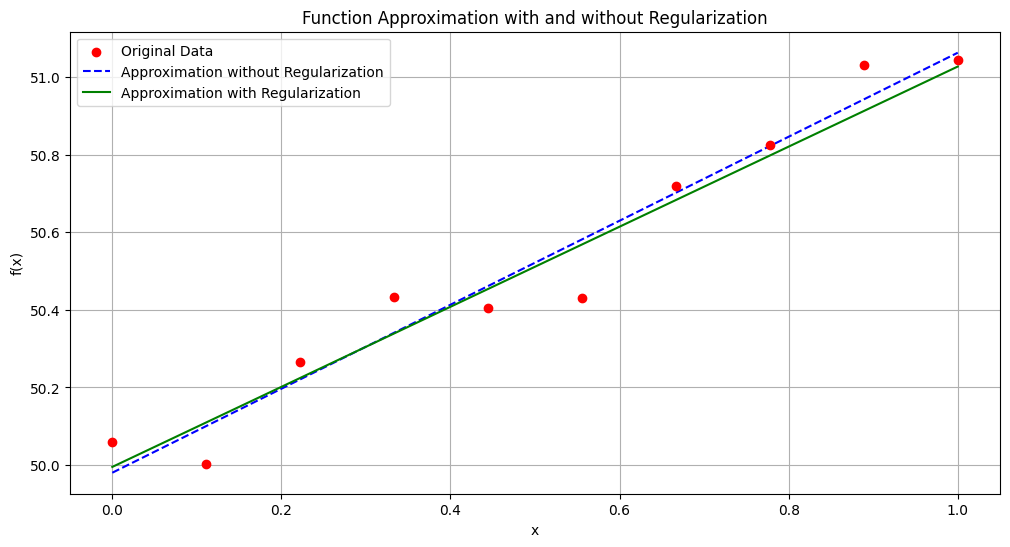

In [11]:
# Vizuelizacija
x_plot = np.linspace(0, 1, 100)

f_plot_no_reg = x_no_reg[0] + x_no_reg[1] * x_plot
f_plot_reg = x_reg[0] + x_reg[1] * x_plot

plt.figure(figsize=(12, 6))

# Originalni podaci
plt.scatter(x, f, color='red', label='Original Data', zorder=5)

# Aproksimacija bez regularizacije
plt.plot(x_plot, f_plot_no_reg, label='Approximation without Regularization', linestyle='--', color='blue')

# Aproksimacija sa regularizacijom
plt.plot(x_plot, f_plot_reg, label='Approximation with Regularization', linestyle='-', color='green')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Function Approximation with and without Regularization')
plt.grid(True)
plt.show()